In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
raw_data = pd.read_csv('wekinator/saved/detection_test.csv')
df = pd.DataFrame(raw_data)
df

,ID,'yyyy/MM/dd HH:mm:ss:SSS','Training round',inputs-1,inputs-2,inputs-3,outputs-1,outputs-2,outputs-3,outputs-4,outputs-5
0,1,'2023/06/11 21:24:44:523',1,2124.109619,6983.652832,11940.431641,0,0,0,0,0
1,2,'2023/06/11 21:24:44:779',1,1920.089233,7082.841797,12503.474609,0,0,0,0,0
2,3,'2023/06/11 21:24:45:035',1,1819.918335,3249.430420,7853.134277,0,0,0,0,0
3,4,'2023/06/11 21:24:45:296',1,1857.338745,3205.806152,7922.210449,0,0,0,0,0
4,5,'2023/06/11 21:24:45:547',1,2117.331787,7109.687988,11246.824219,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,73,'2023/06/11 21:25:02:527',1,0.000000,295.287598,7207.015137,0,0,0,0,0
73,74,'2023/06/11 21:25:02:789',1,0.000000,0.000000,2104.894043,0,0,0,0,0
74,75,'2023/06/11 21:25:03:039',1,1928.457275,2266.641602,7661.079590,0,0,0,0,0
75,76,'2023/06/11 21:25:03:296',1,1901.836914,3014.963379,7823.427246,0,0,0,0,0


In [ ]:
ID,'yyyy/MM/dd HH:mm:ss:SSS','Training round',inputs-1,inputs-2,inputs-3,outputs-1,outputs-2,outputs-3,outputs-4,outputs-5


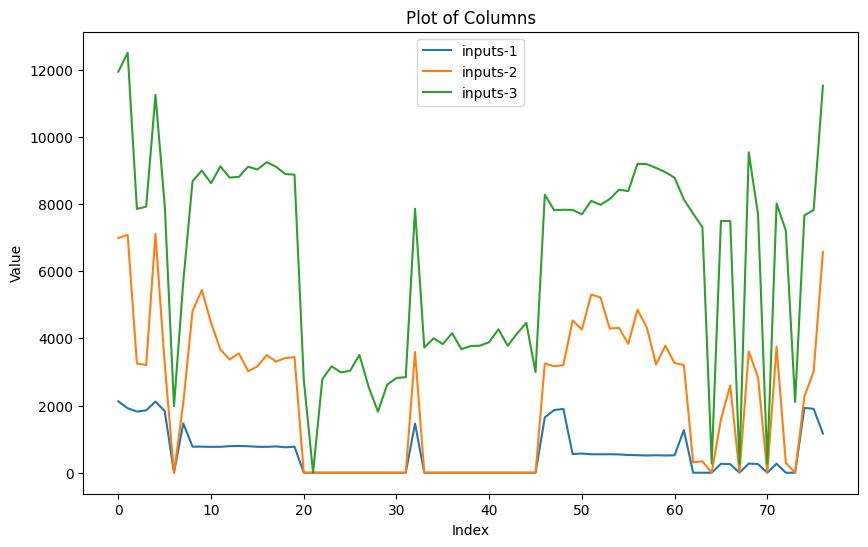

In [12]:
# Extract the columns of interest
columns = ['inputs-1', 'inputs-2', 'inputs-3']
data = df[columns]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, dashes=False)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Columns')

# Display the plot
plt.show()